In [92]:
# https://jehyunlee.github.io/2021/12/02/Python-DS-92-rougier01/

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from matplotlib.patches import Rectangle

* An affine transformation is any transformation that
    * preserves collinearity (i.e., all points lying on a line initially still lie on a line after transformation) and
    * ratios of distances (e.g., the midpoint of a line segment remains the midpoint after transformation).

In the `Affine2D` function a 2-dimensional Affine transformation is implemented.

`S0`, sample data consisted of 7 points, is prepared on cartesian coordinate system.

Each point has x and y coordinate, therefore shape of S0 is (7, 2).

`Sc`, a dataset with 7 values are prepared by using `np.linspace()` to paint each point with a differnt color.

`S1` is obtained by rotating `S0` by 30 degrees in a counterclockwise direction by using `Affine2D().rotate_deg(30).transform(S0)`.

In [93]:
# Define the x,y coordinates for 7 points
S0 = np.array([[0, 0],
               [1, 0],
               [3, 0],
               [0, 1],
               [1, 1],
               [0, 3],
               [3, 3]])

# Evenly spaced numbers to use as color parameters
Sc = np.linspace(0, 1, len(S0))

# Affine transform the S0 points by rotating 30 degrees
S1 = Affine2D().rotate_deg(30).transform(S0)

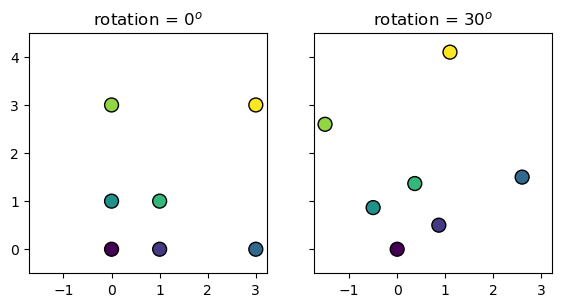

In [94]:
# Visualize
fig_s, axs_s = plt.subplots(ncols=2, figsize=(6, 3), sharex=True, sharey=True)

for ax_s, S, t in zip(axs_s, [S0, S1], [0, 30]):
    ax_s.scatter(S[:, 0], S[:, 1], c=Sc, s=100, ec="k")
       
    ax_s.set_aspect(1)
    ax_s.set_ylim(-0.5, 4.5)
    ax_s.set_title(f"rotation = {t}$^o$", fontsize="large")
    
fig_s.tight_layout()

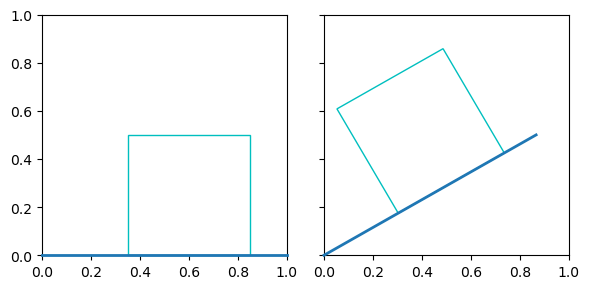

In [95]:

'''
We can get the same result by using a different method. We will rotate R0, a Matplotlib Rectangle object.
Declerating Rt as the designation and applying R0.set_transform(Rt) to R0 changes the coordinates of itself.
'''

fig_s, axs_s = plt.subplots(ncols=2, figsize=(6, 3), sharex=True, sharey=True)

for ax_s in axs_s:
    R0 = Rectangle((0.35, 0.0), 0.5, 0.5, fc="none", ec="c", zorder=-1, clip_on=False)
    if ax_s == axs_s[1]:
        Rt = Affine2D().rotate_deg(30) + axs_s[1].transData
        fig_s.lines.extend([plt.Line2D([0, 1], [0, 0],
                                transform=Affine2D().rotate_deg(30) + axs_s[1].transData,
                                lw=2,
                                )
                                ])
        R0.set_transform(Rt)
    else:
        fig_s.lines.extend([plt.Line2D([0, 1], [0, 0],
                                transform=Affine2D().rotate_deg(0) + ax_s.transData,
                                lw=2,
                                )
                                ])
    ax_s.add_patch(R0)
    
fig_s.tight_layout()


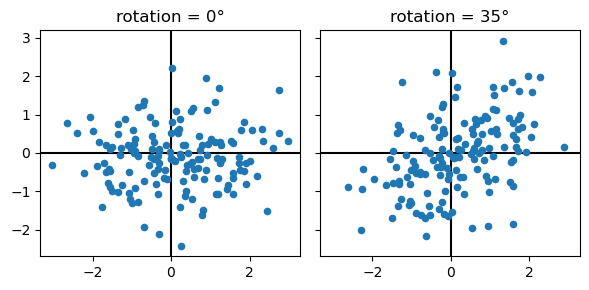

In [96]:
np.random.seed(123)

# Generate some data
Z0 = np.random.normal(0, (1.25, 0.75), (150, 2))  # Z0: 2D random points array
Z1 = Affine2D().rotate_deg(35).transform(Z0)      # Z1: rotated Z0
Zm = Z1.mean(axis=0)       

# Visualize
fig_r, axs_r = plt.subplots(ncols=2, figsize=(6, 3), sharex=True, sharey=True)
for Z, ax, t in zip([Z0, Z1], axs_r, [0, 35]):
    ax.scatter(Z[:,0], Z[:,1], c='tab:blue', s=20)
    ax.axhline(0, c="k", zorder=-1)
    ax.axvline(0, c="k", zorder=-1)
    ax.set_title(f"rotation = {t}°", fontsize="large")

Zall = np.concatenate([Z0, Z1])    
xmin, xmax = Zall[:,0].min(), Zall[:,0].max()
ymin, ymax = Zall[:,1].min(), Zall[:,1].max()

axs_s[0].set_xlim(xmin, xmax)

fig_r.tight_layout()

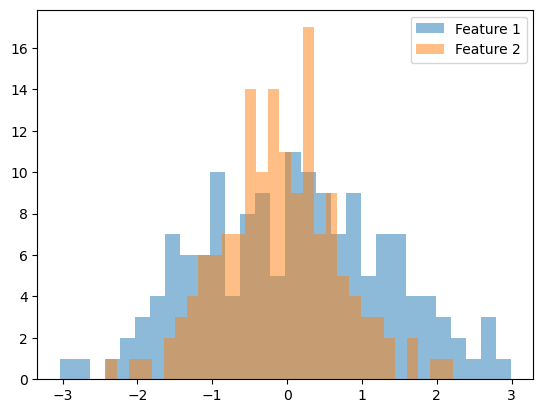

In [97]:
# Reproducibility seed
np.random.seed(123)

# Generate some data

'''
Z0: 2D random points array

The code above generates a 2D array of random points Z0 with 150 points and 2 features.
The first feature is generated from a normal distribution with a mean of 0 and a standard deviation of 1.25.
The second feature is generated from a normal distribution with a mean of 0 and a standard deviation of 0.75.
'''

plt.hist(Z0[:, 0], bins=30, alpha=0.5, label='Feature 1')
plt.hist(Z0[:, 1], bins=30, alpha=0.5, label='Feature 2')
plt.legend()
plt.show()

### How the Affine transformation works


$$ R(\theta) = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix} $$

For a 35° rotation, the matrix is:

$$ R(35) = \begin{bmatrix} \cos(35) & -\sin(35) \\ \sin(35) & \cos(35) \end{bmatrix} $$


Note: 35° needs to be converted to radians to be used in the `np.cos()` and `np.sin()` functions. This is because the trigonometric functions in numpy work with radians.

```md
A degree is a measure of angle based on dividing a circle into 360 equal parts.
A radian is a measure of angle based on the radius of a circle.
Specifically, one radian is the angle created when the arc length is equal to the radius of the circle.
```

In [98]:
import math

new_x = Z0[0:1, 0] * math.cos(math.radians(35)) - Z0[0:1, 1] * math.sin(math.radians(35))
new_y = Z0[0:1, 0] * math.sin(math.radians(35)) + Z0[0:1, 1] * math.cos(math.radians(35))
new_x, new_y

(array([-1.54066105]), array([-0.16563199]))

In [99]:
Z0[0:1, :], Z1[0:1, :]

(array([[-1.35703825,  0.74800908]]), array([[-1.54066105, -0.16563199]]))

-----

### PCA


The PCA is peformed using `numpy.linalg.eig()`.

This function returns two values, `V` and `W` which are the eigenvalues (W) and eigenvectors (V) of the covariance matrix of the dataset.
To get the principal components, we need to get the eigenvector corresponding to the largest eigenvalue and the eigenvector corresponding to the second largest eigenvalue.


PCs are columns of V, and the 1st one has the highest eigenvalue


Get PC1 and PC2 from the eigenvalue V and eigenvector W. 

The T(tangent to PC1) and O(orthogonal to PC1, equivalent to PC2).


In [100]:
# W: eigenvalues, V: eigenvectors
W, V = np.linalg.eig(np.cov(Z1.T)) 

In [101]:
V, W

(array([[ 0.78913179, -0.61422391],
        [ 0.61422391,  0.78913179]]),
 array([1.57134284, 0.61339386]))

In [102]:
# The principal components are the columns of V. The first PC is the one with the highest eigenvalue
# The V matrix is sorted by the eigenvalues in descending order 
PC1, PC2 = V.T[np.flip(np.argsort(abs(W)))]
PC1, PC2

(array([0.78913179, 0.61422391]), array([-0.61422391,  0.78913179]))

In [103]:
# This transformation ensures that the first principal component is always "upwards"
if PC2[1] < 0:
    PC2 = -PC2

In [104]:
'''
Y
|
|     PC1
|    /
|   /
|  / rotation
| /
|/__________ X

'''

rotation = 180 * np.arctan2(*np.flip(PC1)) / np.pi # the 1st argument of arctan2 is the y value
rotation

37.89555000213858

In [105]:
T = np.array([PC1[0], PC1[1]])                     # tangent vector of PC1 (a deep copy of PC1)
O = np.array([PC2[0], PC2[1]])                     # orthogonal vector of PC1 (a deep copy of PC2)

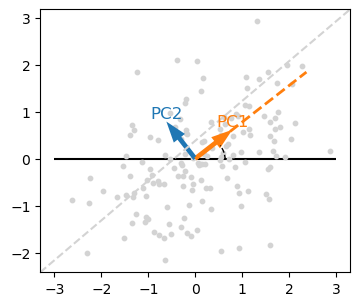

In [106]:
from matplotlib.patches import Arc

# visualize
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(Z1[:,0], Z1[:,1], c="lightgray", s=10)

for pc, c in zip(["PC1", "PC2"], ["tab:orange", "tab:blue"]):
    ax.arrow(0, 0, *eval(pc), width=0.1, length_includes_head=True, ec="none", fc=c)
    ax.text(*eval(pc), pc, ha="center", va="bottom", fontsize="large", color=c)


arc = Arc((Zm[0], Zm[1]), 1., 1.0, angle=0, theta1=0, theta2=rotation, color='black', linestyle='--')
plt.gca().add_patch(arc)

fig.lines.extend([plt.Line2D([0, 3], [0, 0],
                                transform=Affine2D().rotate_deg(rotation) + ax.transData,
                                #transform=ax.transData,
                                lw=2,
                                ls="--",
                                color="tab:orange",
                                zorder=0,
                                )
                                ])
#insert a 45 degree line
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="lightgray", linestyle="--")

ax.hlines(0, -3, 3, color="k", zorder=-1)

ax.set_aspect(1)

------

### Parenthesis about the PCA rotation


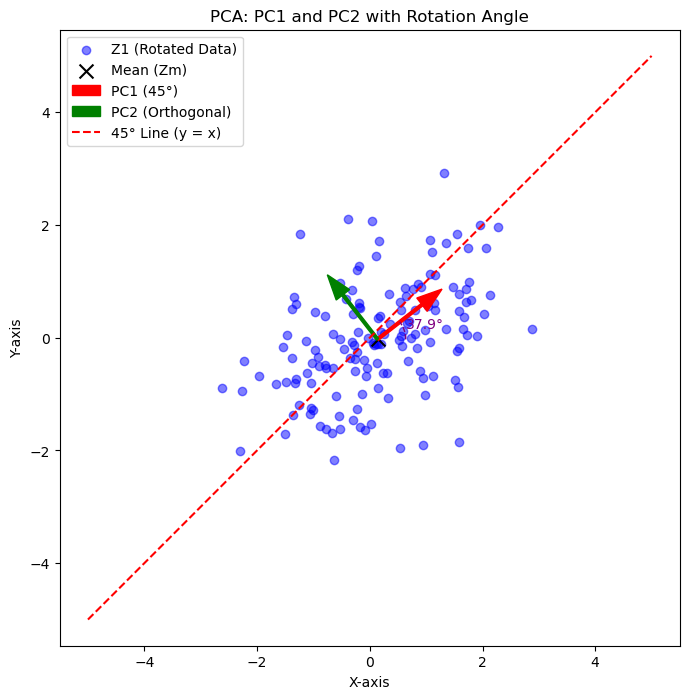

In [107]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(Z1[:, 0], Z1[:, 1], color='blue', alpha=0.5, label='Z1 (Rotated Data)')

# Plot mean
plt.scatter(Zm[0], Zm[1], color='black', marker='x', s=100, label='Mean (Zm)')

# Plot PC1 vector (T)
plt.arrow(Zm[0], Zm[1], T[0], T[1], color='red', width=0.05, head_width=0.3, label='PC1 (45°)')

# Plot PC2 vector (O)
plt.arrow(Zm[0], Zm[1], O[0], O[1], color='green', width=0.05, head_width=0.3, label='PC2 (Orthogonal)')

# Draw rotation angle arc
arc = Arc((Zm[0], Zm[1]), 1.0, 1.0, angle=0, theta1=0, theta2=rotation, color='purple', linestyle='--')
plt.gca().add_patch(arc)
plt.text(Zm[0] + 0.5, Zm[1] + 0.2, f'{rotation:.1f}°', color='purple')


x_values = np.linspace(-5, 5, 100)  # 100 points from -5 to 5
y_values = x_values  # Since y = x

plt.plot(x_values, y_values, 'r--', label='45° Line (y = x)')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('PCA: PC1 and PC2 with Rotation Angle')
plt.legend()
plt.axis('equal')  # Equal scaling
plt.show()

----

### PCA as a Rotation

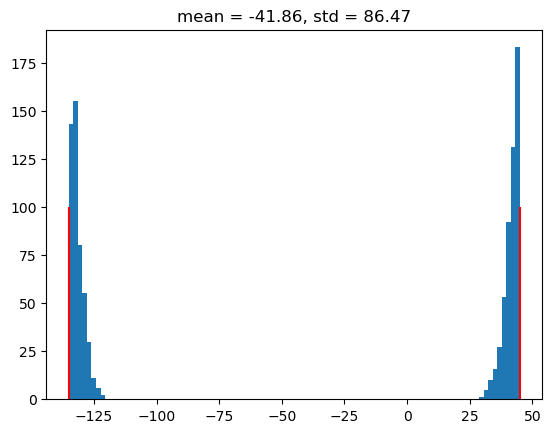

In [108]:
rot_vals = []
for i in range(1000):
    Z0 = np.random.normal(0, (1.25, 0.75), (150, 2))  # Z0: 2D random points array
    #Z0 = np.abs(Z0)

    Z1 = Affine2D().rotate_deg(45).transform(Z0)      # Z1: rotated Z0
    Zm = Z1.mean(axis=0)                              # mean of Z1. Zm = np.array([ 0.13746892, -0.02793329])


    # Principal components analysis
    # Note that for some seeds, the PC1 and PC2 needs to be inverted
    # It could be fixed by looking at the orientation but I'm lazy
    W, V = np.linalg.eig(np.cov(Z1.T))                 # W: eigenvalues, V: eigenvectors
    PC1, PC2 = V.T[np.flip(np.argsort(abs(W)))]        # PCs are columns of V, and the 1st one has the highest eigenvalue
    
    T = np.array([PC1[0], PC1[1]])                     # tangent vector of PC1 (a deep copy of PC1)
    O = np.array([PC2[0], PC2[1]])                     # orthogonal vector of PC1 (a deep copy of PC2)

    rotation = 180 * np.arctan2(*np.flip(PC1)) / np.pi
    rot_vals.append(rotation)


'''
Half of the values are 45° and the other half are -135°.
This is because the eigenvectors are not unique. They can be flipped without changing the result.
-135 is the same as 180°-45°, so the overall orientation of the vector is the same

'''

plt.hist(rot_vals,bins=100)
plt.title( f"mean = {np.mean(rot_vals):.2f}, std = {np.std(rot_vals):.2f}")
plt.vlines(45, 0, 100, color='red', label='Mean')
plt.vlines(-135, 0, 100, color='red', label='Mean')
plt.show()

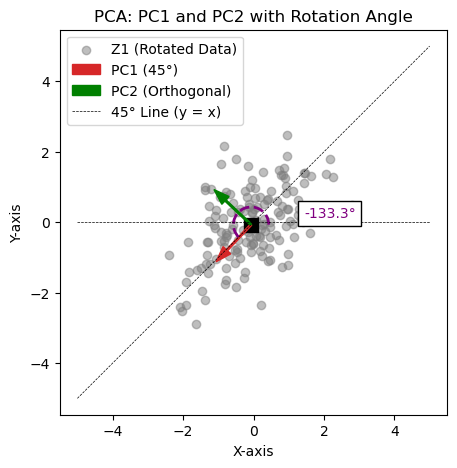

In [109]:
for i in range(1000):
    Z0 = np.random.normal(0, (1.25, 0.75), (150, 2))  # Z0: 2D random points array
    #Z0 = np.abs(Z0)

    Z1 = Affine2D().rotate_deg(45).transform(Z0)      # Z1: rotated Z0
    Zm = Z1.mean(axis=0)                              # mean of Z1. Zm = np.array([ 0.13746892, -0.02793329])


    # Principal components analysis
    # Note that for some seeds, the PC1 and PC2 needs to be inverted
    # It could be fixed by looking at the orientation but I'm lazy
    W, V = np.linalg.eig(np.cov(Z1.T))                 # W: eigenvalues, V: eigenvectors
    PC1, PC2 = V.T[np.flip(np.argsort(abs(W)))]        # PCs are columns of V, and the 1st one has the highest eigenvalue
    
    if PC1[1] < 0:
        break

T = np.array([PC1[0], PC1[1]])                     # tangent vector of PC1 (a deep copy of PC1)
O = np.array([PC2[0], PC2[1]])                     # orthogonal vector of PC1 (a deep copy of PC2)

rotation = 180 * np.arctan2(*np.flip(PC1)) / np.pi

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(Z1[:, 0], Z1[:, 1], color='tab:gray', alpha=0.5, label='Z1 (Rotated Data)')

# Plot mean
plt.scatter(Zm[0], Zm[1], color='black', marker='s', s=100)

# Plot PC1 vector (T)
plt.arrow(Zm[0], Zm[1], T[0], T[1], color='tab:red', width=0.05, head_width=0.3, label='PC1 (45°)')

# Plot PC2 vector (O)
plt.arrow(Zm[0], Zm[1], O[0], O[1], color='green', width=0.05, head_width=0.3, label='PC2 (Orthogonal)')

# Draw rotation angle arc
arc = Arc((Zm[0], Zm[1]), 1.0, 1.0, angle=0, theta1=0, theta2=rotation, color='purple', linestyle='--',lw=2)
plt.gca().add_patch(arc)
plt.text(Zm[0] + 1.5, Zm[1] + 0.2, f'{rotation:.1f}°', color='purple', bbox=dict(facecolor='white'))


x_values = np.linspace(-5, 5, 100)  # 100 points from -5 to 5
y_values = x_values  # Since y = x

plt.plot(x_values, y_values, 'k--', label='45° Line (y = x)',lw=0.5)
plt.hlines(0, -5, 5, color='k', linestyle='--',lw=0.5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('PCA: PC1 and PC2 with Rotation Angle')
plt.legend()
plt.axis('equal')  # Equal scaling
plt.show()

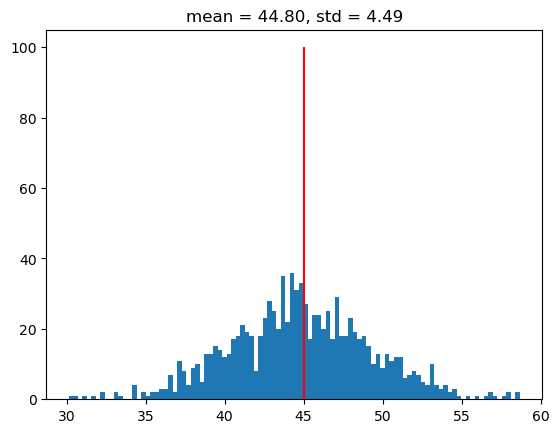

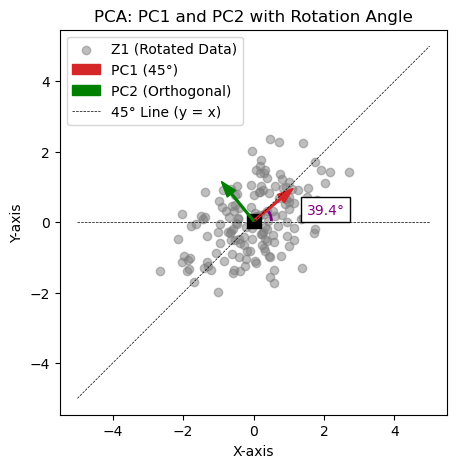

In [110]:
'''
Forcing PC1 to be positive will result in the expected 45° rotation:
'''

rot_vals = []
for i in range(1000):
    Z0 = np.random.normal(0, (1.25, 0.75), (150, 2))  # Z0: 2D random points array
    #Z0 = np.abs(Z0)

    Z1 = Affine2D().rotate_deg(45).transform(Z0)      # Z1: rotated Z0
    Zm = Z1.mean(axis=0)                              # mean of Z1. Zm = np.array([ 0.13746892, -0.02793329])


    # Principal components analysis
    # Note that for some seeds, the PC1 and PC2 needs to be inverted
    # It could be fixed by looking at the orientation but I'm lazy
    W, V = np.linalg.eig(np.cov(Z1.T))                 # W: eigenvalues, V: eigenvectors
    PC1, PC2 = V.T[np.flip(np.argsort(abs(W)))]        # PCs are columns of V, and the 1st one has the highest eigenvalue
    if PC2[1] < 0:                                     # to make PC2 "upwards"
        PC2 = -PC2

    if PC1[1] < 0:                                     # to make PC1 "upwards"
        PC1 = -PC1


    T = np.array([PC1[0], PC1[1]])                     # tangent vector of PC1 (a deep copy of PC1)
    O = np.array([PC2[0], PC2[1]])                     # orthogonal vector of PC1 (a deep copy of PC2)

    rotation = 180 * np.arctan2(*np.flip(PC1)) / np.pi
    rot_vals.append(rotation)


plt.hist(rot_vals,bins=100)
plt.title( f"mean = {np.mean(rot_vals):.2f}, std = {np.std(rot_vals):.2f}")
plt.vlines(45, 0, 100, color='red', label='Mean')
plt.show()


############################################################

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(Z1[:, 0], Z1[:, 1], color='tab:gray', alpha=0.5, label='Z1 (Rotated Data)')

# Plot mean
plt.scatter(Zm[0], Zm[1], color='black', marker='s', s=100)

# Plot PC1 vector (T)
plt.arrow(Zm[0], Zm[1], T[0], T[1], color='tab:red', width=0.05, head_width=0.3, label='PC1 (45°)')

# Plot PC2 vector (O)
plt.arrow(Zm[0], Zm[1], O[0], O[1], color='green', width=0.05, head_width=0.3, label='PC2 (Orthogonal)')

# Draw rotation angle arc
arc = Arc((Zm[0], Zm[1]), 1.0, 1.0, angle=0, theta1=0, theta2=rotation, color='purple', linestyle='--',lw=2)
plt.gca().add_patch(arc)
plt.text(Zm[0] + 1.5, Zm[1] + 0.2, f'{rotation:.1f}°', color='purple', bbox=dict(facecolor='white'))


x_values = np.linspace(-5, 5, 100)  # 100 points from -5 to 5
y_values = x_values  # Since y = x

plt.plot(x_values, y_values, 'k--', label='45° Line (y = x)',lw=0.5)
plt.hlines(0, -5, 5, color='k', linestyle='--',lw=0.5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('PCA: PC1 and PC2 with Rotation Angle')
plt.legend()
plt.axis('equal')  # Equal scaling
plt.show()

------
------

## Build the figure

### Draw the scatteplot and indicate the orientation of the PC1 with a line

In [111]:
# Reproducibility seed
np.random.seed(123)

# Generate some data
Z0 = np.random.normal(0, (1.25, 0.75), (150, 2))  # Z0: 2D random points array
Z1 = Affine2D().rotate_deg(35).transform(Z0)      # Z1: rotated Z0
Zm = Z1.mean(axis=0)                              # mean of Z1. Zm = np.array([ 0.13746892, -0.02793329])


# Principal components analysis
# Note that for some seeds, the PC1 and PC2 needs to be inverted
# It could be fixed by looking at the orientation but I'm lazy
W, V = np.linalg.eig(np.cov(Z1.T))                 # W: eigenvalues, V: eigenvectors
PC1, PC2 = V.T[np.flip(np.argsort(abs(W)))]        # PCs are columns of V, and the 1st one has the highest eigenvalue
if PC2[1] < 0:                                     # to make PC2 "upwards"
    PC2 = -PC2
rotation = 180 * np.arctan2(*np.flip(PC1)) / np.pi # the 1st argument of arctan2 is the y value
T = np.array([PC1[0], PC1[1]])                     # tangent vector of PC1 (a deep copy of PC1)
O = np.array([PC2[0], PC2[1]])                     # orthogonal vector of PC1 (a deep copy of PC2)

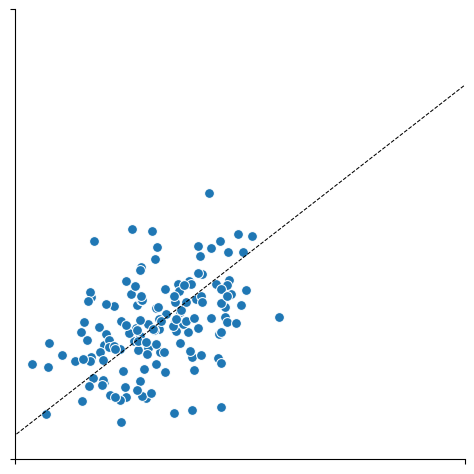

In [112]:
# Draw
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.9, 0.9], aspect=1)

# Main scatter plot
ax1.scatter(Z1[:, 0], Z1[:, 1], s=50, fc="C0", ec="white", lw=0.75)
ax1.set_xlim([-3, 7])
ax1.set_xticks([-3, 7])
ax1.set_xticklabels([])
ax1.set_ylim([-3, 7])
ax1.set_yticks([-3, 7])
ax1.set_yticklabels([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)


# Draw main PCA axis
P0 = np.vstack([Zm - T * 10, Zm + T * 10])         # P0 : endpoints of a long line along PC1
ax1.plot(P0[:, 0], P0[:, 1], color="black", linestyle="--", linewidth=0.75, zorder=10)

###  Bounding box along PCA axes


Time to draw bounding box around the points:

* Rotate the Z1 along its X-axis, then find d which is half of the box's abolute y value.
* Get 4 points of the bounding box from O, T and d, store as P2.
* Finally, create Polygon object from P2 and add it by using ax1.add_patch().

In [113]:
# Compute the width of the distribution along orthogonal direction to the PCA
# main axis. This is made by rotating points and taking max on the Y axis.
transform = Affine2D().rotate_deg(-rotation)
P1 = transform.transform(Z1 - Z1.mean(axis=0))     # P1 : rotated Z1, along x-axis
d = np.abs(P1[:, 1]).max()                         # d  : max. distance between P0 and Z1

# Draw a rectangle surrounding the distribution & oriented along PCA main axis
P2 = np.vstack(                                    # P2 : rectangle surrounding Z1
    [
        Zm - 10 * T - d * O,
        Zm + (6 - d) * T - d * O,
        Zm + (6 - d) * T + d * O,
        Zm - 10 * T + d * O,
    ]
)
ax1.add_patch(
    Polygon(
        P2,
        closed=True,
        fill=True,
        edgecolor="None",
        facecolor="C0",
        alpha=0.1,
        zorder=-50,
    )
)

Boundary of the bounding box should be more clear, and the triangle markers denoting means Zm should be visible on each axis. <br>
Get the coordinates of the outline, P3 and P4, from Zm, d, T and O, then apply a slightly darker outline by using the command `ax1.plot()`.

In [114]:
### This block will be added as a separate figure 
# P3, P4 : edges of P2 parallel to PC1
P3 = np.vstack([Zm - 10 * T, Zm + (6 - d) * T]) - d * O  
ax1.plot(P3[:, 0], P3[:, 1], color="C0", linestyle="-", linewidth=0.75, alpha=0.25)
P4 = np.vstack([Zm - 10 * T, Zm + (6 - d) * T]) + d * O
ax1.plot(P4[:, 0], P4[:, 1], color="C0", linestyle="-", linewidth=0.75, alpha=0.25)

# Some markers on the axis to show the mean (we could compute exactly the delta
# for placing the marker but it is not the point of this example)
ax1.scatter(Zm[0], -2.85, s=50, color="black", marker="v", clip_on=False)
ax1.scatter(-2.85, Zm[1], s=50, color="black", marker="<", clip_on=False)

### Add Axes for rotated histogram


The next step is the grand finale of this visualization, the rotated histogram. <br>
In order to add rotated histogram, new Axes should be formed at the exact site with the exact angle and size. <br>
And then histogram is added with the rotation.
<br>
<br>
We are now going to form a square shaped space in the direction, and as an extension, of PC1.<br>
The height and width of the space is same as the height of Polygon based on P2.<br>
The center coordinate C of the histogram space is calculated.<br>

In [115]:
# 1. Compute the center of the histogram
C = Zm + 6 * T

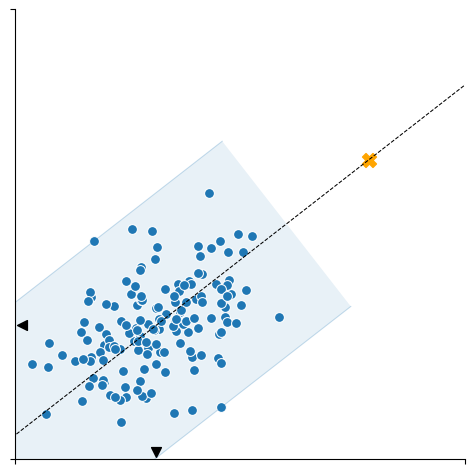

In [116]:
# Show where the histogram will be located
ax1.scatter(*C, s=100, c="orange", marker="X", zorder=1)
ax1.figure

In [117]:
# Calculate the height h0 and width w0 of the histogram space.


# 2. Compute the coordinate and the size in normalized figure coordinates
x, y = fig.transFigure.inverted().transform(ax1.transData.transform(C))
xo, yo = fig.transFigure.inverted().transform(ax1.transData.transform(C + 2 * d * O))
h0 = w0 = np.sqrt((xo - x) ** 2 + (yo - y) ** 2)    # preparation of the histogram Axes

x,y, xo, yo, h0, w0

(0.7585033707560449,
 0.6491669168248484,
 0.5013226056198264,
 0.9795830957297655,
 0.4187084871819259,
 0.4187084871819259)

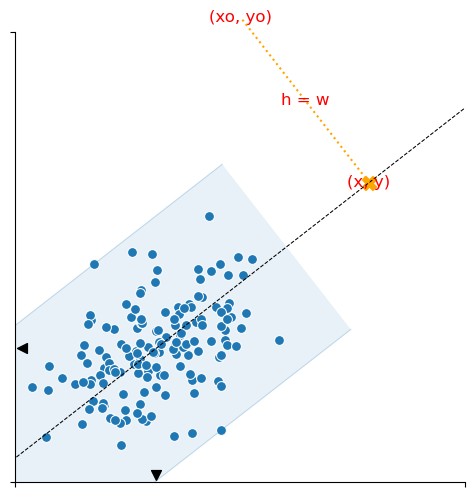

In [118]:
#visualize
import matplotlib.lines as lines

text_xy = fig.text(x, y, "(x, y)", c="r", zorder=1,
                   ha="center", va="center", fontsize="large")
text_xyo = fig.text(xo, yo, "(xo, yo)", c="r", zorder=1,
                    ha="center", va="center", fontsize="large")
line_hw = fig.add_artist(lines.Line2D([x, xo], [y, yo], c="orange", ls=":"))
text_hw = fig.text((x+xo)/2, (y+yo)/2, "h = w", c="r", 
                   ha="center", va="center", fontsize="large")
display(fig)

Based on this dimensions Axes for histogram, `ax2` is generated. <br>
`floating_axes` is used for irregular Axes.

### Create the secondary axis for the histogram

In [119]:
#    Warning: it must be squared, ie. xmax-xmin = ymax-ymin
#    It is possible to have non squared axis, but it would complicate things.
xmin, xmax = -16, 16
ymin, ymax = 0, xmax - xmin
transform = Affine2D().rotate_deg(rotation-90)
helper = floating_axes.GridHelperCurveLinear(transform, (xmin, xmax, ymin, ymax))
ax2 = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper, zorder=0)

# 4. We know the size of the axis we want but it is rotated. When we specify
#    the size and position, it related to the non-rotate axis and we thus need
#    to compute the bounding box. To do that, we rotate the four coordinates
#    from which we deduce the bounding box coordinates.
transform = Affine2D().rotate_deg(rotation-90)
R = transform.transform(                            # outline of the histogram Axes
    [
        (x - w0 / 2, y - h0 / 2),
        (x + w0 / 2, y - h0 / 2),
        (x - w0 / 2, y + h0 / 2),
        (x + w0 / 2, y + h0 / 2),
    ]
)
w1 = R[:, 0].max() - R[:, 0].min()                  # width of the histogram Axes
h1 = R[:, 1].max() - R[:, 1].min()                  # height of the histogram Axes
ax2.set_position((x - w1 / 2, y - h1 / 2, w1, h1))
fig.add_subplot(ax2)                                # Adding histogram Axes

<FloatingAxesHostAxes: >

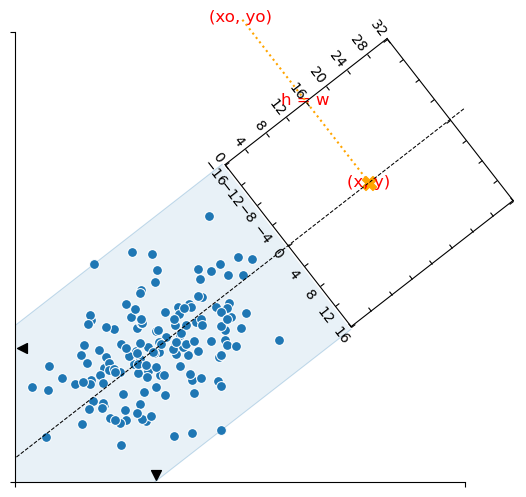

In [120]:
# visualization
for text in fig.texts:
    text.set_zorder(1)
ax2.set_zorder(3)
ax2.set_facecolor("none")
display(fig)

### Add Rotated histogram and axis settings

As the new Axes is prepared, it is time to add the histogram. <br>
To visualize data on a rotated space, another Axes should be generated using ax2.get_aux_axes(transform).<br>
numpy.histogram(-Z1 @ PC1) is used to obtain histogram along the PC2 axis. The code returns data frequences orthogonal to PC1 axis.<br>

In [121]:
# 5. Some decoration the secondary axis
ax2.axis["left"].major_ticklabels.set_visible(False)
ax2.axis["bottom"].major_ticklabels.set_visible(False)
ax2.axis["bottom"].major_ticks.set_tick_out(True)
ax2.axis["left"].set_visible(False)
ax2.axis["right"].set_visible(False)
ax2.axis["top"].set_visible(False)
ax2.set_xticks([0, 1])
ax2.patch.set_visible(False)

# 6. Display the histogram, taking care of the extents of the X axis
counts, bins = np.histogram(-Z1 @ PC1, bins=12)     # histogram of -Z1 orthogonal to PC1 direction with 12 bins
X0 = (bins - bins[0]) / (bins[-1] - bins[0])        # X0 : normalized bins range [0, 1]
X1 = xmin + (xmax - xmin) * X0                      # X1 : stretched bins range [xmin, xmax] = [-16, 16]
Y = np.array(counts)

# This auxiliary axis is necessary to draw stuff (no real idea why)
ax2_aux = ax2.get_aux_axes(transform)

# Plotting histogram 
ax2_aux.hist(X1[:-1], X1, weights=Y, facecolor="C0", edgecolor="white", linewidth=0.25)

text_xy.remove()
text_xyo.remove()
text_hw.remove()
line_hw.remove()


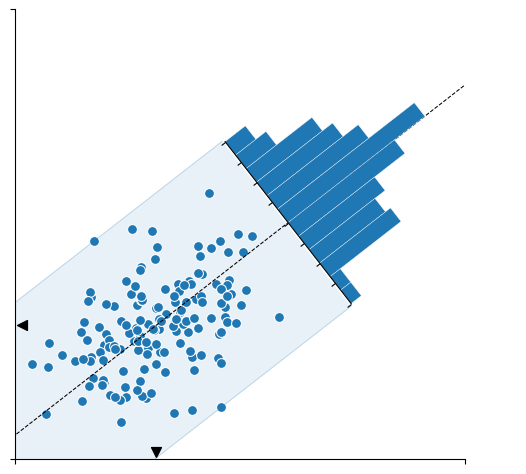

In [122]:
ax1.figure

At last, put numbers on top of the bars of histogram.

In [123]:
rotation-90

-52.10444999786142

In [124]:
# 7. Adding some labels
dx, dy = (X1[1] - X1[0]) / 2, 0.75
for x, y in zip(X1, Y):
    ax2_aux.text(
        x + dx,
        y + dy,
        "%d" % y,
        ha="center",
        va="center",
        size=8,
        rotation=rotation-90,
    )

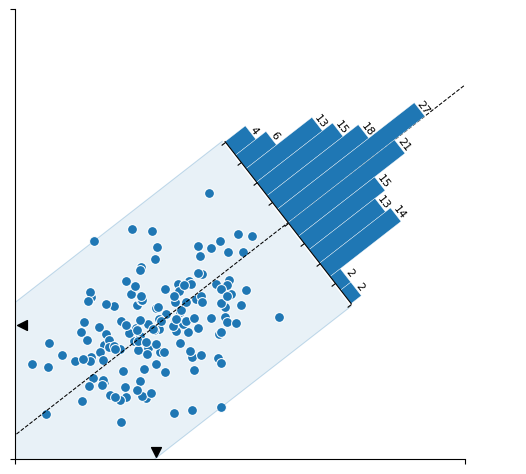

In [125]:
display(fig)